# Random Forest Classifier
Examples, and an attempt of implementation

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion, make_pipeline
%matplotlib inline

In [2]:
iris = datasets.load_iris()
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target})

X = data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y = data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [3]:
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [4]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


## Our data
Let's get down to business. The strategy is:
* Encode the categorical variables
* Find a way to input and mark the missing values
* Train a random forest classifier

In [23]:
train_transaction = pd.read_csv('train_transaction.csv', nrows=30000)
X, y = train_transaction.drop('isFraud', axis=1), train_transaction['isFraud']

In [24]:
# Variables we do not want to take into account
irrelevant_vars = set(['addr1', 'addr2', 'dist1', 'dist2', 
                        'P_emaildomain', 'R_emaildomain', *[f'D{i}' for i in range(2,16)],
                        *[f'M{i}' for i in range(1,10)]])
X.drop(labels=irrelevant_vars, axis=1, inplace=True)

### Encoding categorical variables

In [25]:
categorical_vars = set(['ProductCD', *[f'card{i}' for i in [6,4]]]) 
continuous_vars = X_train.columns.difference(categorical_vars)
categorical_vars = list(categorical_vars)
lb_make = LabelEncoder()
for i in categorical_vars:
    X.loc[:,i] = lb_make.fit_transform(X.loc[:,i].astype(str))

### Train test split
We use 80% of our data for training and 20% for test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
transformer = FeatureUnion(
    transformer_list=[
        ('features', SimpleImputer(strategy='mean')),
        ('indicators', MissingIndicator())])

In [20]:
clf = make_pipeline(transformer, RandomForestClassifier())
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [21]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9816666666666667


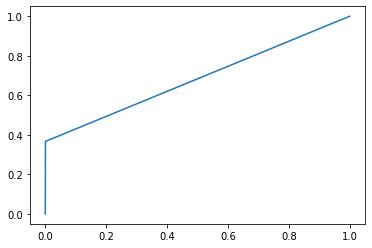

In [30]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred)
plt.plot(fpr_rf, tpr_rf, label='RF')